# Logistic Regression

## Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

# Set working directory
month_file = '5_September'
# Set working directory
os.chdir("/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/"+month_file+"/Ending Balances/Per_Player")

## Top Players

In [13]:
# Filter Columns
filter = ['gender', 'age_gen', 'day', 'timeofday', 'first_outcome',
        'first_wager','first_p/b', 'last_outcome', 'last_wager', 'last_p/b',
        'beginning_amt', 'ending_amt', 'ending_balance',  'ave_slotdenom', 
        'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
        'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
        'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope', 
        '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet', '#dec_maxbet', 
        '#W', '#L', '#NH', '#D', '#2ws', '#3ws', '#4ws',
        'w/min', 'l/min', '2ws/min', '3ws/min', '4ws/min',
        'nh/min', 'd/min', 'w/g', 'l/g', 'nh/g', 'd/g', 
        'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
        'machines_changes', 'unique_machines', 'ave_time_per_machine',
        'total_duration', 'total_gambles', 'continue_playing']


# Load dataset
dataset = pd.read_parquet('top_players_continuation_by_session.parquet', columns=filter)

# # Seperate dependent and independent variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Econde gender column (Binary)
le = LabelEncoder()

# Binary Encode gender
X[:, 0] = le.fit_transform(X[:, 0])

# # Encode age_generartion, first_outoce, last_outcome columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2, 3, 4, 7])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

sc = StandardScaler()

# Scale all columns except the encoded ones
X_train[:, 25:] = sc.fit_transform(X_train[:, 25:])
X_test[:, 25:] = sc.transform(X_test[:, 25:])

classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, y_pred, average='macro'))

[[107 145]
 [ 68 330]]
Accuracy:  0.6723076923076923
Precision:  0.6530827067669174
Recall:  0.6268744516231953
F1 Score:  0.6285923529459105


### Which IDVs have the most weight in the model

In [14]:
# Create a dictionary mapping column names to their index positions
column_index_mapping = {index: column_name for index, column_name in enumerate(dataset.columns)}

# Print the dictionary
print(column_index_mapping)

{0: 'gender', 1: 'age_gen', 2: 'day', 3: 'timeofday', 4: 'first_outcome', 5: 'first_wager', 6: 'first_p/b', 7: 'last_outcome', 8: 'last_wager', 9: 'last_p/b', 10: 'beginning_amt', 11: 'ending_amt', 12: 'ending_balance', 13: 'ave_slotdenom', 14: 'std_slotdenom', 15: 'min_slotdenom', 16: 'max_slotdenom', 17: 'ave_theo_payback', 18: 'min_theo_payback', 19: 'max_theo_payback', 20: 'ave_wageramt', 21: 'std_wageramt', 22: 'min_wager', 23: 'max_wager', 24: 'ave_p/b', 25: 'std_p/b', 26: 'max_p/b', 27: 'max_profit', 28: 'depletion_slope', 29: '#inc_slotdenom', 30: '#dec_slotdenom', 31: '#inc_maxbet', 32: '#dec_maxbet', 33: '#W', 34: '#L', 35: '#NH', 36: '#D', 37: '#2ws', 38: '#3ws', 39: '#4ws', 40: 'w/min', 41: 'l/min', 42: '2ws/min', 43: '3ws/min', 44: '4ws/min', 45: 'nh/min', 46: 'd/min', 47: 'w/g', 48: 'l/g', 49: 'nh/g', 50: 'd/g', 51: 'ave_time_per_gamble', 52: 'min_time_per_gamble', 53: 'max_time_per_gamble', 54: 'machines_changes', 55: 'unique_machines', 56: 'ave_time_per_machine', 57: 't

In [15]:
from sklearn.inspection import permutation_importance

# Assuming you have a trained classifier named 'classifier' and encoded data named 'X_encoded'
# Calculate permutation importances
result = permutation_importance(classifier, X_train, y_train, n_repeats=10, random_state=42)

# Get feature importances and feature names
importances = result.importances_mean
feature_names = ct.get_feature_names_out()

# Sort feature importances
feature_importance = list(zip(feature_names, importances))
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print feature importances
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")


encoder__x3_night: 0.040277242972660734
remainder__x17: 0.030573738929534043
remainder__x53: 0.023719676549865187
remainder__x19: 0.01983057373892947
remainder__x33: 0.01601848286484401
remainder__x41: 0.011898344243357672
encoder__x3_morning: 0.011590296495956841
remainder__x56: 0.010358105506353443
remainder__x38: 0.009472468232576015
remainder__x34: 0.009125914516750034
remainder__x46: 0.00908740854832496
encoder__x3_evening: 0.005621871390065414
remainder__x25: 0.005467847516364999
encoder__x3_afternoon: 0.005429341547939881
remainder__x29: 0.004774740084713102
remainder__x30: 0.003696572968810119
remainder__x23: 0.0030419715055833184
encoder__x7_draw: 0.0023873700423564957
remainder__x36: 0.0020023103581054635
remainder__x54: 0.0016172506738543757
remainder__x44: 0.0015017327685790892
remainder__x9: 0.0015017327685790671
remainder__x35: 0.0013092029264535343
encoder__x2_3.0: 0.0012321909896033322
remainder__x18: 0.0011166730843280126
remainder__x51: 0.0009626492106275975
encoder__

## Cumulative Accuracy Profile (CAP) Graph

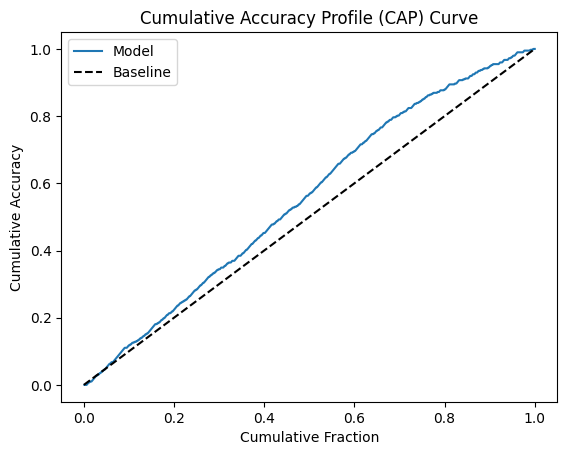

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities or scores named 'predicted_scores' and true labels named 'true_labels'

# Sort the scores and corresponding true labels
sorted_indices = np.argsort(y_pred)[::-1]
sorted_true_labels = y_test[sorted_indices]

# Calculate cumulative metrics
total_positive = np.sum(y_test)
cumulative_positives = np.cumsum(sorted_true_labels)
cumulative_accuracy = cumulative_positives / total_positive
cumulative_fraction = np.arange(1, len(sorted_true_labels) + 1) / len(sorted_true_labels)

# Create the CAP curve plot
plt.plot(cumulative_fraction, cumulative_accuracy, label='Model')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Cumulative Fraction')
plt.ylabel('Cumulative Accuracy')
plt.title('Cumulative Accuracy Profile (CAP) Curve')
plt.legend()
plt.show()

## Bottom Players

In [10]:
# Filter Columns
filter = ['gender', 'age_gen', 'day', 'timeofday', 'first_outcome',
        'first_wager','first_p/b', 'last_outcome', 'last_wager', 'last_p/b',
        'beginning_amt', 'ending_amt', 'ending_balance',  'ave_slotdenom', 
        'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
        'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
        'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope', 
        '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet', '#dec_maxbet', 
        '#W', '#L', '#NH', '#D', '#2ws', '#3ws', '#4ws',
        'w/min', 'l/min', '2ws/min', '3ws/min', '4ws/min',
        'nh/min', 'd/min', 'w/g', 'l/g', 'nh/g', 'd/g', 
        'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
        'machines_changes', 'unique_machines', 'ave_time_per_machine',
        'total_duration', 'total_gambles', 'continue_playing']


# Load dataset
dataset = pd.read_parquet('ntop_players_continuation_by_session.parquet', columns=filter)

# # Seperate dependent and independent variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Econde gender column (Binary)
le = LabelEncoder()

# Binary Encode gender
X[:, 0] = le.fit_transform(X[:, 0])

# # Encode age_generartion, first_outoce, last_outcome columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2, 3, 4, 7])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

sc = StandardScaler()

# Scale all columns except the encoded ones
X_train[:, 25:] = sc.fit_transform(X_train[:, 25:])
X_test[:, 25:] = sc.transform(X_test[:, 25:])

classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, y_pred, average='macro'))

[[1956   58]
 [ 558   70]]
Accuracy:  0.7668433005299016
Precision:  0.6624589797136038
Recall:  0.5413332785153606
F1 Score:  0.5245713911791651


In [11]:
# Create a dictionary mapping column names to their index positions
column_index_mapping = {index: column_name for index, column_name in enumerate(dataset.columns)}

# Print the dictionary
print(column_index_mapping)

{0: 'gender', 1: 'age_gen', 2: 'day', 3: 'timeofday', 4: 'first_outcome', 5: 'first_wager', 6: 'first_p/b', 7: 'last_outcome', 8: 'last_wager', 9: 'last_p/b', 10: 'beginning_amt', 11: 'ending_amt', 12: 'ending_balance', 13: 'ave_slotdenom', 14: 'std_slotdenom', 15: 'min_slotdenom', 16: 'max_slotdenom', 17: 'ave_theo_payback', 18: 'min_theo_payback', 19: 'max_theo_payback', 20: 'ave_wageramt', 21: 'std_wageramt', 22: 'min_wager', 23: 'max_wager', 24: 'ave_p/b', 25: 'std_p/b', 26: 'max_p/b', 27: 'max_profit', 28: 'depletion_slope', 29: '#inc_slotdenom', 30: '#dec_slotdenom', 31: '#inc_maxbet', 32: '#dec_maxbet', 33: '#W', 34: '#L', 35: '#NH', 36: '#D', 37: '#2ws', 38: '#3ws', 39: '#4ws', 40: 'w/min', 41: 'l/min', 42: '2ws/min', 43: '3ws/min', 44: '4ws/min', 45: 'nh/min', 46: 'd/min', 47: 'w/g', 48: 'l/g', 49: 'nh/g', 50: 'd/g', 51: 'ave_time_per_gamble', 52: 'min_time_per_gamble', 53: 'max_time_per_gamble', 54: 'machines_changes', 55: 'unique_machines', 56: 'ave_time_per_machine', 57: 't

In [12]:
from sklearn.inspection import permutation_importance

# Assuming you have a trained classifier named 'classifier' and encoded data named 'X_encoded'
# Calculate permutation importances
result = permutation_importance(classifier, X_train, y_train, n_repeats=10, random_state=42)

# Get feature importances and feature names
importances = result.importances_mean
feature_names = ct.get_feature_names_out()

# Sort feature importances
feature_importance = list(zip(feature_names, importances))
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print feature importances
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")


remainder__x57: 0.02755324183625183
remainder__x34: 0.017501183151916753
remainder__x53: 0.01424514907714155
remainder__x25: 0.0034926644581164566
remainder__x14: 0.0023095125414103633
remainder__x39: 0.0020160908660672326
remainder__x49: 0.0019214387127307608
remainder__x35: 0.0015806909607193997
remainder__x31: 0.0012210127780407421
remainder__x55: 0.0008424041646947766
remainder__x48: 0.000785612872692909
remainder__x41: 0.0007666824420256013
encoder__x3_night: 0.0005584477046853165
remainder__x56: 0.000511121628017075
remainder__x32: 0.0004921911973498006
remainder__x44: 0.00046379555134884454
remainder__x12: 0.0004353999053478885
remainder__x24: 0.0003975390440132953
remainder__x21: 0.0003218173213441089
remainder__x15: 0.00023663038334125196
remainder__x19: 0.00019876952200665877
encoder__x2_3.0: 0.00019876952200662546
remainder__x13: 0.00014197823000476894
remainder__x29: 0.00014197823000474674
remainder__x16: 0.00011358258400381293
encoder__x2_5.0: 9.465215333649412e-05
encoder

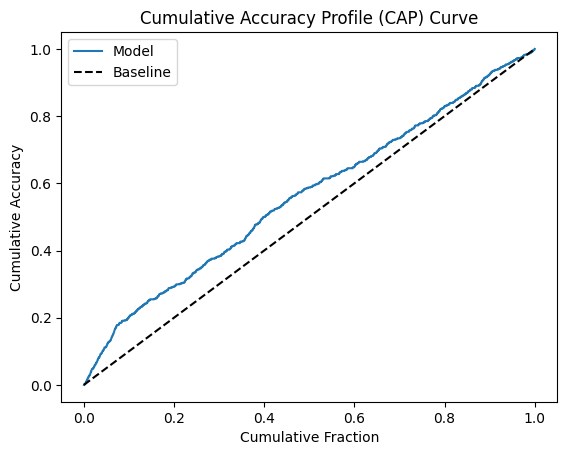

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities or scores named 'predicted_scores' and true labels named 'true_labels'

# Sort the scores and corresponding true labels
sorted_indices = np.argsort(y_pred)[::-1]
sorted_true_labels = y_test[sorted_indices]

# Calculate cumulative metrics
total_positive = np.sum(y_test)
cumulative_positives = np.cumsum(sorted_true_labels)
cumulative_accuracy = cumulative_positives / total_positive
cumulative_fraction = np.arange(1, len(sorted_true_labels) + 1) / len(sorted_true_labels)

# Create the CAP curve plot
plt.plot(cumulative_fraction, cumulative_accuracy, label='Model')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Cumulative Fraction')
plt.ylabel('Cumulative Accuracy')
plt.title('Cumulative Accuracy Profile (CAP) Curve')
plt.legend()
plt.show()